In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

In [28]:
data = load_diabetes()
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [14]:
X = data.data

In [30]:
dataframe = pd.DataFrame(X,columns=data.feature_names)
dataframe

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [32]:
y = data.target
target = pd.DataFrame(y,columns=["Target"])
target

,Target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [34]:
df = pd.concat([dataframe,target],axis=1)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


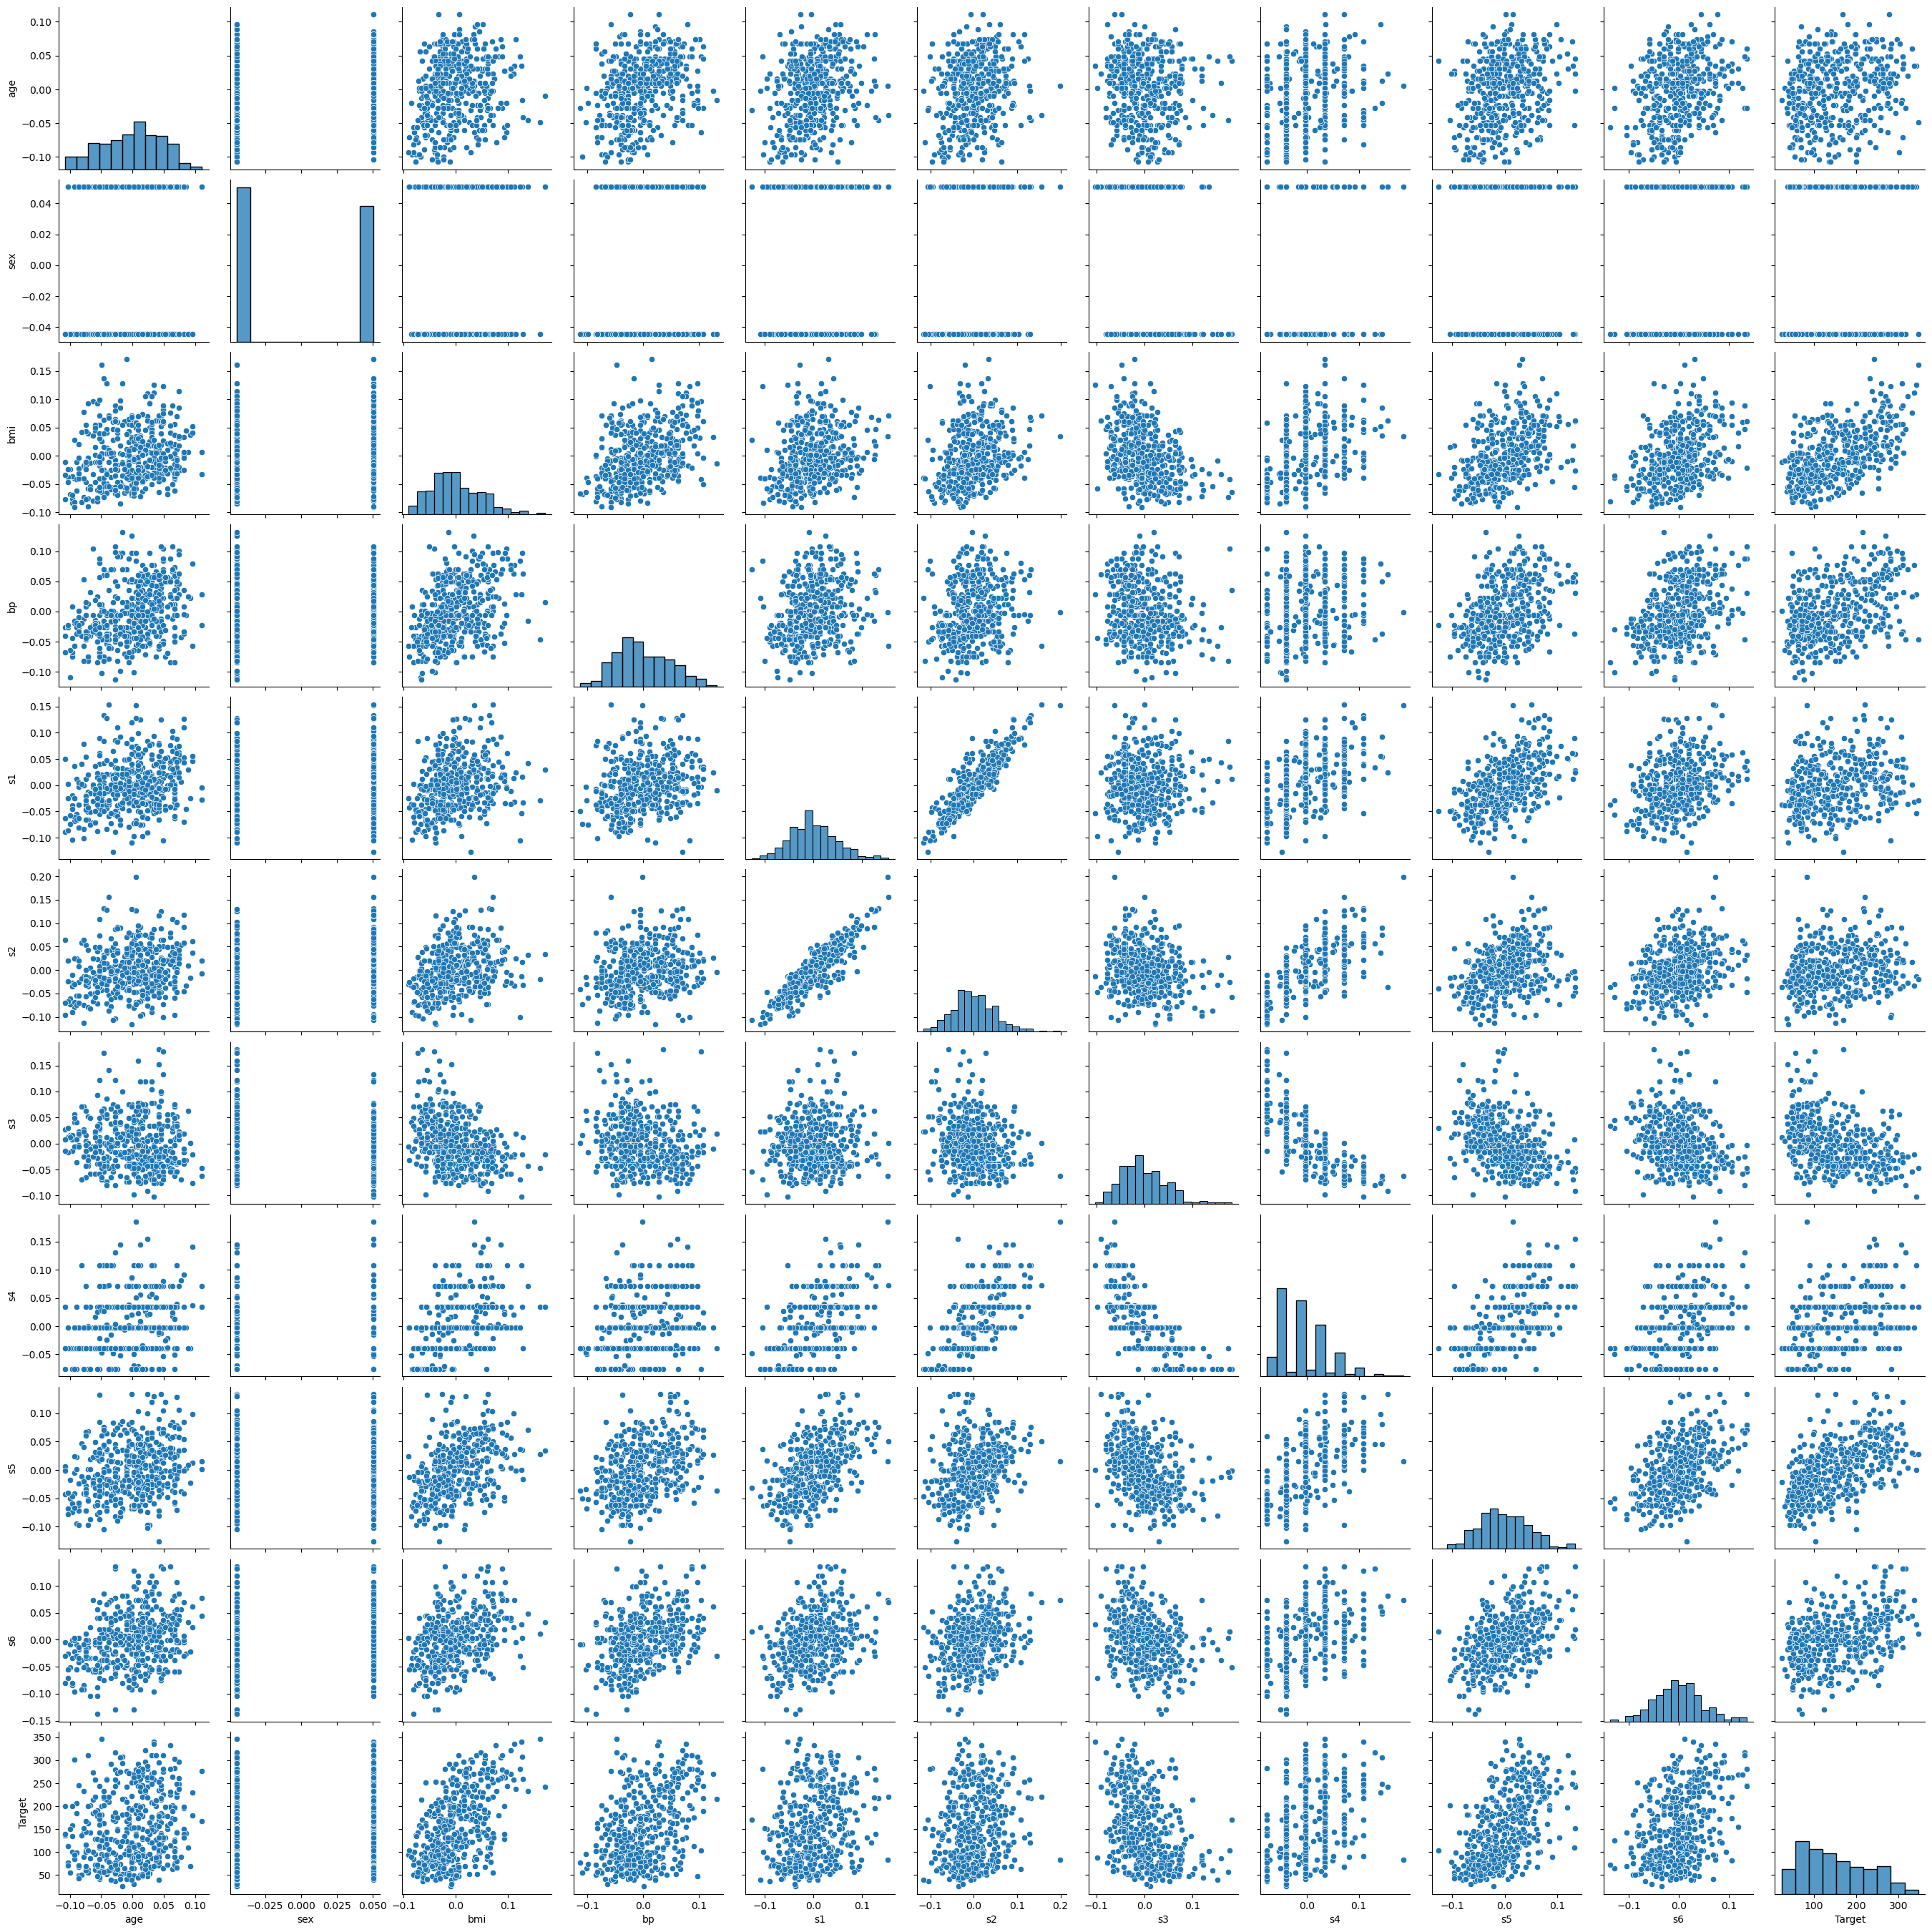

In [35]:
import seaborn as sns
sns.pairplot(df)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
     

lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()
     

estimators = [('lr',lr),('dt',dt),('svr',svr)]

In [17]:
for estimator in estimators:
  scores = cross_val_score(estimator[1],X,y,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))

lr 0.46
dt -0.23
svr 0.15


In [18]:
from sklearn.ensemble import VotingRegressor
     

vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.34


In [19]:
for i in range(1,4):
  for j in range(1,4):
    for k in range(1,4):
      vr = VotingRegressor(estimators,weights=[i,j,k])
      scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
      print("For i={},j={},k={}".format(i,j,k),np.round(np.mean(scores),2))

For i=1,j=1,k=1 0.33
For i=1,j=1,k=2 0.34
For i=1,j=1,k=3 0.32
For i=1,j=2,k=1 0.26
For i=1,j=2,k=2 0.27
For i=1,j=2,k=3 0.29
For i=1,j=3,k=1 0.2
For i=1,j=3,k=2 0.22
For i=1,j=3,k=3 0.25
For i=2,j=1,k=1 0.4
For i=2,j=1,k=2 0.38
For i=2,j=1,k=3 0.37
For i=2,j=2,k=1 0.34
For i=2,j=2,k=2 0.34
For i=2,j=2,k=3 0.34
For i=2,j=3,k=1 0.27
For i=2,j=3,k=2 0.3
For i=2,j=3,k=3 0.32
For i=3,j=1,k=1 0.42
For i=3,j=1,k=2 0.41
For i=3,j=1,k=3 0.39
For i=3,j=2,k=1 0.37
For i=3,j=2,k=2 0.38
For i=3,j=2,k=3 0.37
For i=3,j=3,k=1 0.31
For i=3,j=3,k=2 0.34
For i=3,j=3,k=3 0.35


In [20]:
# using the same algorithm

dt1 = DecisionTreeRegressor(max_depth=1)
dt2 = DecisionTreeRegressor(max_depth=3)
dt3 = DecisionTreeRegressor(max_depth=5)
dt4 = DecisionTreeRegressor(max_depth=7)
dt5 = DecisionTreeRegressor(max_depth=None)
     

estimators = [('dt1',dt1),('dt2',dt2),('dt3',dt3),('dt4',dt4),('dt5',dt5)]

In [25]:
for estimator in estimators:
  scores = cross_val_score(estimator[1],X,y,scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))

dt1 0.15
dt2 0.29
dt3 0.17
dt4 -0.05
dt5 -0.21


In [26]:
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.21


In [42]:



lr = LinearRegression()
lr1 = LinearRegression()
lr2 = LinearRegression()
lr3 = LinearRegression()

estimators = [("lr",lr),("lr1",lr),("lr2",lr),("lr3",lr)]
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,scoring="r2",cv=10)
print("Voting Regressor ", np.round(np.mean(scores),2))

Voting Regressor  0.46


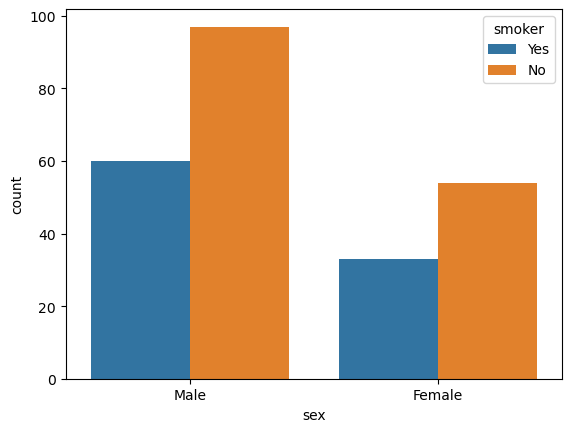

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# read a tips.csv file from seaborn library
df = sns.load_dataset('tips')
 
# count plot on two categorical variable
sns.countplot(x ='sex', hue = "smoker", data = df)
 
# Show the plot
plt.show()

In [2]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# read a titanic.csv file
# from seaborn library
df = sns.load_dataset('titanic')
 
sns.countplot(x = 'class', y = 'fare',
            hue = 'sex',
            data = df,color="salmon")
 
# Show the plot
plt.show()

ValueError: Cannot pass values for both `x` and `y`